#### Временные ряды и обработка сигналов. Лабораторная работа №2
|   Группа          |   Вариант         |   ФИО             |   
|   :------------:  |   :------------:  |   :------------:  |
|   М092501(71)     |   16 (1)          |   Шарибжанов И.Т. |

In [2]:
%pip install scikit-learn torch statsmodels matplotlib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Импорт библиотек
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [ ]:
# Чтение данных
data_by_week = pd.read_csv('data/1.data-b-5w.csv')
data_out_week = pd.read_csv('data/1.data-b-10-06.csv')

# Преобразование timestamp в datetime
data_by_week['time'] = data_by_week['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
data_by_week = data_by_week.rename(columns={'time': 'datetime'})

data_out_week['time'] = data_out_week['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
data_out_week = data_out_week.rename(columns={'time': 'datetime'})

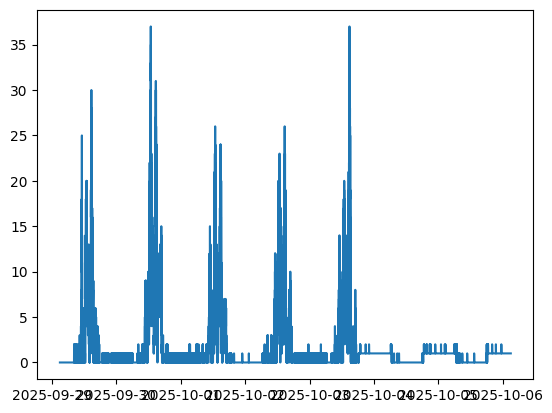

In [5]:
# Просмотр данных
plt.plot(data_by_week['datetime'], data_by_week['people_amount'])
plt.show()

In [6]:
data_by_week

,datetime,people_amount
0,2025-09-29 03:00:03.419700,0
1,2025-09-29 03:00:08.441400,0
2,2025-09-29 03:00:13.474300,0
3,2025-09-29 03:00:18.483900,0
4,2025-09-29 03:00:23.508700,0
...,...,...
117661,2025-10-06 02:59:36.134000,1
117662,2025-10-06 02:59:41.142600,1
117663,2025-10-06 02:59:46.163100,1
117664,2025-10-06 02:59:51.185100,1


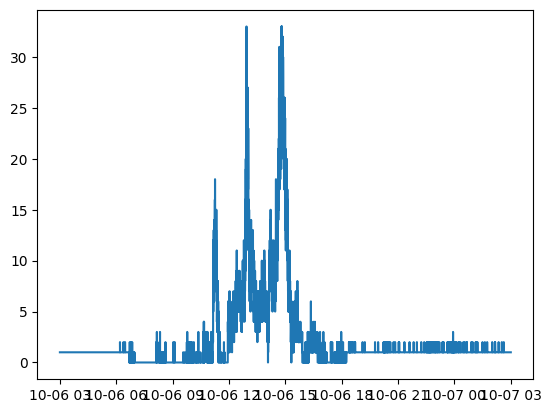

In [7]:
# Просмотр данных
plt.plot(data_out_week['datetime'], data_out_week['people_amount'])
plt.show()

In [8]:
data_out_week

,datetime,people_amount
0,2025-10-06 03:00:01.207300,1
1,2025-10-06 03:00:06.213100,1
2,2025-10-06 03:00:11.224900,1
3,2025-10-06 03:00:16.246700,1
4,2025-10-06 03:00:21.264800,1
...,...,...
16908,2025-10-07 02:59:36.732300,1
16909,2025-10-07 02:59:41.765000,1
16910,2025-10-07 02:59:46.790700,1
16911,2025-10-07 02:59:51.823300,1


In [9]:
# Фильтрация бесполезных участков (отбрасываем строки с people_amount == 0)
data_by_week = data_by_week[data_by_week['people_amount'] > 0]
data_out_week = data_out_week[data_out_week['people_amount'] > 0]

In [10]:
data_by_week

,datetime,people_amount
3716,2025-09-29 08:15:24.075100,1
3724,2025-09-29 08:16:05.447600,1
3728,2025-09-29 08:16:25.518900,1
3731,2025-09-29 08:16:40.579100,1
3732,2025-09-29 08:16:45.594500,1
...,...,...
117661,2025-10-06 02:59:36.134000,1
117662,2025-10-06 02:59:41.142600,1
117663,2025-10-06 02:59:46.163100,1
117664,2025-10-06 02:59:51.185100,1


In [11]:
data_out_week

,datetime,people_amount
0,2025-10-06 03:00:01.207300,1
1,2025-10-06 03:00:06.213100,1
2,2025-10-06 03:00:11.224900,1
3,2025-10-06 03:00:16.246700,1
4,2025-10-06 03:00:21.264800,1
...,...,...
16908,2025-10-07 02:59:36.732300,1
16909,2025-10-07 02:59:41.765000,1
16910,2025-10-07 02:59:46.790700,1
16911,2025-10-07 02:59:51.823300,1


In [12]:
# Установка datetime как индекса
data_by_week.set_index('datetime', inplace=True)
data_out_week.set_index('datetime', inplace=True)

In [13]:
# Resample данных на 5-минутные интервалы (среднее значение)
# Агрегация данных по 5-минутным интервалам с заполнением пропусков нулями
resampled_week = data_by_week.resample('5T').mean().fillna(0)
resampled_out = data_out_week.resample('5T').mean().fillna(0)

C:\Users\shari\AppData\Local\Temp\ipykernel_4360\1445932342.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_week = data_by_week.resample('5T').mean().fillna(0)
C:\Users\shari\AppData\Local\Temp\ipykernel_4360\1445932342.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled_out = data_out_week.resample('5T').mean().fillna(0)


**Ресемплинг** — это процесс изменения частоты временных рядов, то есть преобразование данных, чтобы они имели равные временные интервалы. В контексте временных рядов это может означать либо **агрегацию** (объединение данных в более крупные временные интервалы, например, из секунд в минуты), либо **интерполяцию** (разбиение на более мелкие интервалы). В данном случае ресэмплинг используется для агрегации данных в 5-минутные интервалы. Это делается для **упрощения данных** и **подготовки к моделированию** (для модели LSTM важно, чтобы данные были равномерно распределены по времени, так как модель работает с последовательностями фиксированной длины),  **снижения шума** (если данные собираются с высокой частотой, например, каждые несколько секунд, они могут содержать много шума или незначительных колебаний)

In [14]:
resampled_week

,people_amount
datetime,
2025-09-29 08:15:00,1.210526
2025-09-29 08:20:00,1.333333
2025-09-29 08:25:00,0.000000
2025-09-29 08:30:00,0.000000
2025-09-29 08:35:00,0.000000
...,...
2025-10-06 02:35:00,1.000000
2025-10-06 02:40:00,1.000000
2025-10-06 02:45:00,1.000000


In [15]:
resampled_out

,people_amount
datetime,
2025-10-06 03:00:00,1.000000
2025-10-06 03:05:00,1.000000
2025-10-06 03:10:00,1.000000
2025-10-06 03:15:00,1.000000
2025-10-06 03:20:00,1.000000
...,...
2025-10-07 02:35:00,1.016949
2025-10-07 02:40:00,1.000000
2025-10-07 02:45:00,1.000000


In [16]:
# Проверка стационарности
adf_result = adfuller(resampled_week['people_amount'])
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -4.744488
p-value: 0.000069


In [17]:
# Если ряд нестационарен (p-value > 0.05), применяем дифференцирование
if adf_result[1] > 0.05:
    resampled_week['people_amount'] = resampled_week['people_amount'].diff().fillna(0)
    resampled_out['people_amount_diff'] = resampled_out['people_amount'].diff().fillna(0)

In [18]:
# Масштабирование данных
scaler = MinMaxScaler(feature_range=(0, 1))
col_to_use = 'people_amount'
scaled_week = scaler.fit_transform(resampled_week[[col_to_use]])
scaled_out = scaler.transform(resampled_out[['people_amount']])

Масштабирование (или нормализация) данных — это процесс приведения числовых значений к определенному диапазону (в данном случае, от 0 до 1 с помощью `MinMaxScaler`). Это делается для **улучшения сходимости модели** (нейронные сети, такие как LSTM, чувствительны к масштабу входных данных), **унификации масштаба** (если данные имеют разные единицы измерения или диапазоны, это может запутать модель), **устранения влияния выбросов**

In [19]:
scaled_week

array([[0.04005668],
       [0.0441204 ],
       [0.        ],
       ...,
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ]], shape=(1953, 1))

In [20]:
scaled_out

array([[0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0330903 ],
       [0.0336418 ],
       [0.0330903 ],
       [0.03365115],
       [0.03365115],
       [0.0330903 ],
       [0.0330903 ],
       [0.03370308],
       [0.0345944 ],
       [0.03492865],
       [0.033

In [21]:
# Функция для создания последовательностей
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [22]:
seq_length = 12  # 1 час (12 * 5 мин)

X_week, y_week = create_sequences(scaled_week, seq_length)

Модель LSTM (Long Short-Term Memory) — это тип рекуррентной нейронной сети, предназначенный для работы с временными рядами или последовательностями данных. Она анализирует данные не по отдельным точкам, а в виде последовательностей, чтобы улавливать временные зависимости (например, как значение в текущий момент связано с предыдущими значениями). Чтобы подготовить данные для LSTM, необходимо преобразовать временной ряд в набор последовательностей фиксированной длины, где каждая последовательность состоит из входных данных (`x`) и целевого значения (`y`). Это и делает функция `create_sequences`.

In [23]:
X_week

array([[[0.04005668],
        [0.0441204 ],
        [0.        ],
        ...,
        [0.0330903 ],
        [0.03954694],
        [0.03899928]],

       [[0.0441204 ],
        [0.        ],
        [0.        ],
        ...,
        [0.03954694],
        [0.03899928],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.03899928],
        [0.        ],
        [0.0330903 ]],

       ...,

       [[0.0330903 ],
        [0.0330903 ],
        [0.0330903 ],
        ...,
        [0.0330903 ],
        [0.0330903 ],
        [0.0330903 ]],

       [[0.0330903 ],
        [0.0330903 ],
        [0.0330903 ],
        ...,
        [0.0330903 ],
        [0.0330903 ],
        [0.0330903 ]],

       [[0.0330903 ],
        [0.0330903 ],
        [0.0330903 ],
        ...,
        [0.0330903 ],
        [0.0330903 ],
        [0.0330903 ]]], shape=(1941, 12, 1))

In [24]:
y_week

array([[0.       ],
       [0.0330903],
       [0.0330903],
       ...,
       [0.0330903],
       [0.0330903],
       [0.0330903]], shape=(1941, 1))

In [25]:
# Разделение на train и val (80/20)
train_size = int(len(X_week) * 0.8)
X_train = X_week[:train_size]
y_train = y_week[:train_size]
X_val = X_week[train_size:]
y_val = y_week[train_size:]

# Преобразование в тензоры
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).float()

**Тренировочный набор (`train`)**: Это часть данных, которая используется для обучения модели. Модель LSTM "учится" на этих данных, подстраивая свои параметры (веса) так, чтобы минимизировать ошибку предсказания (в вашем случае, между предсказанными и реальными значениями `people_amount`.
**Валидационный набор (`val`)**: Это часть данных, которая используется для оценки производительности модели во время обучения, но не участвует в обучении. Валидационные данные помогают проверить, насколько хорошо модель обобщает (то есть работает на данных, которые она не видела во время обучения).
`X_train = X_week[:train_size]`: Первые 80% последовательностей идут в тренировочный набор. `X_val = X_week[train_size:]`: Оставшиеся 20% — в валидационный набор. Аналогично для `y_train` и `y_val`.

После разделения на тренировочный и валидационный наборы данные преобразуются в тензоры PyTorch.
**Тензоры** — это многомерные массивы, используемые в библиотеке PyTorch для представления данных и выполнения вычислений. Они аналогичны массивам NumPy, но имеют дополнительные возможности, такие как поддержка вычислений на GPU и автоматическое вычисление градиентов для обучения нейронных сетей.

In [26]:
# Определение модели LSTM
# Модель LSTM (Long Short-Term Memory) — это тип рекуррентной нейронной сети, предназначенный для работы с временными рядами или последовательностями данных
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)    # Начальное скрытое состояние (краткосрочная память)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)    # Начальное состояние ячейки (долгосрочная память)
        out, _ = self.lstm(x, (h0, c0))                     # Пропуск через LSTM
        out = self.fc(out[:, -1, :])                        # Прогноз на последний временной шаг
        return out

**Класс `LSTMModel`** наследуется от `nn.Module` - предоставляет методы для управления параметрами модели (веса, смещения), а также автоматическое вычисление градиентов.

**Метод `__init__`**:
  - Определяет архитектуру модели и инициализирует её слои.
  - Параметры:
    - `input_size=1`: Количество признаков на каждом временном шаге. используется только один признак (`people_amount`)
    - `hidden_size=50`: Размер скрытого состояния LSTM (число нейронов в скрытом слое). Это определяет, сколько информации модель может "запомнить" о предыдущих временных шагах.
    - `output_size=1`: Размер выхода модели. Модель предсказывает одно значение (следующее значение `people_amount`).
  - Сохранение `hidden_size`: `self.hidden_size = hidden_size` сохраняет размер скрытого состояния для использования в методе `forward`.
  - Создание слоев:
    - `self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)`: Создает слой LSTM.
      - `batch_first=True` указывает, что входные данные имеют формат `(batch_size, seq_length, input_size)`, где `batch_size` — количество последовательностей, `seq_length` — длина каждой последовательности (12), `input_size` — 1.
    - `self.fc = nn.Linear(hidden_size, output_size)`: Полносвязный слой, который преобразует выход LSTM (размером `hidden_size`) в одно предсказанное значение (`output_size=1`).

**Метод `forward`**:
  - Определяет, как данные проходят через модель (прямое распространение).
  - Шаги:
    - `h0 = torch.zeros(1, x.size(0), self.hidden_size)`: Инициализирует скрытое состояние LSTM (`h0`) нулями. Форма: `(num_layers, batch_size, hidden_size)`, где:
      - `num_layers=1` (один слой LSTM),
      - `x.size(0)` — размер батча (количество последовательностей),
      - `hidden_size=50`.
    - `c0 = torch.zeros(1, x.size(0), self.hidden_size)`: Инициализирует состояние ячейки LSTM (`c0`) нулями, с той же формой.
    - `out, _ = self.lstm(x, (h0, c0))`: Пропускает входные данные `x` через слой LSTM. Вход `x` имеет форму `(batch_size, seq_length, input_size)`. LSTM возвращает:
      - `out`: Выход для каждого временного шага, форма `(batch_size, seq_length, hidden_size)`.
      - `_`: Кортеж новых скрытых состояний (`h_n`, `c_n`), который игнорируется, так как нас интересует только выход.
    - `out = self.fc(out[:, -1, :])`: Берет выход LSTM для последнего временного шага (`out[:, -1, :]`, форма `(batch_size, hidden_size)`) и пропускает его через полносвязный слой, чтобы получить предсказание формы `(batch_size, output_size)` (в вашем случае `(batch_size, 1)`).
  - Возвращается: `out` — предсказанные значения для каждой последовательности в батче.

Модель состоит из:
  - Слоя LSTM, который обрабатывает последовательности длиной 12 (1 час) с одним признаком (`people_amount`) и производит скрытые состояния размером 50.
  - Полносвязного слоя, который преобразует последнее скрытое состояние в одно предсказанное значение.
После инициализации модель готова принимать входные данные формы `(batch_size, seq_length, 1)` и выдавать предсказания формы `(batch_size, 1)`.

**LSTM** (Long Short-Term Memory) — это тип рекуррентной нейронной сети (RNN), специально разработанный для работы с последовательностями и временными рядами. Она решает проблему "затухания градиентов" в обычных RNN, позволяя модели эффективно запоминать долгосрочные зависимости в данных.

LSTM обрабатывает последовательности (например, значения `people_amount` за 12 временных шагов) и использует три ключевых механизма ("ворота") для управления потоком информации:
1. **Forget Gate (ворота забывания)**: Решает, какую информацию из предыдущего состояния ячейки забыть.
2. **Input Gate (входные ворота)**: Определяет, какую новую информацию добавить в состояние ячейки.
3. **Output Gate (выходные ворота)**: Контролирует, какая часть состояния ячейки передается на выход.

Каждый временной шаг последовательности обрабатывается с учетом:
- **Текущего входа** (`x_t` — значение `people_amount` на шаге `t`).
- **Скрытого состояния** (`h_t` — краткосрочная память, размер `hidden_size=50`).
- **Состояния ячейки** (`c_t` — долгосрочная память, также размер `hidden_size`).

LSTM обновляет `h_t` и `c_t` на каждом шаге, что позволяет модели "помнить" информацию из прошлых шагов, даже если последовательность длинная (например, 12 шагов = 1 час).

In [27]:
# Инициализация модели, критерия и оптимизатора
model = LSTMModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

1. **Определение функции потерь**: `nn.MSELoss` — это среднеквадратичная ошибка (Mean Squared Error, MSE), которая вычисляет разницу между предсказанными значениями (`outputs`) и истинными значениями (`y_train`).

2. **Определение оптимизатора**: `torch.optim.Adam` — оптимизатор Adam (Adaptive Moment Estimation), который используется для обновления весов модели на основе градиентов. `model.parameters()`: Передает все обучаемые параметры модели (веса и смещения слоев LSTM и `fc`) в оптимизатор. `lr=0.001`: Скорость обучения (learning rate) определяет, насколько сильно обновляются веса на каждом шаге. Значение 0.001 — стандартный выбор для начала.

Модель обучается в течение 100 эпох. Эпоха — это один полный проход через весь тренировочный набор данных (`X_train`, `y_train`).

In [28]:
# Обучение модели
epochs = 100
for epoch in range(epochs):
    model.train()               # Режим обучения
    outputs = model(X_train)    # Пропускает весь тренировочный набор через модель
    optimizer.zero_grad()       # Обнуляет градиенты перед новым вычислением
    loss = criterion(outputs, y_train)  # Вычисляет ошибку
    loss.backward()             # Вычисляет градиенты
    optimizer.step()            # Обновляет веса модели
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0132
Epoch [20/100], Loss: 0.0110
Epoch [30/100], Loss: 0.0081
Epoch [40/100], Loss: 0.0073
Epoch [50/100], Loss: 0.0065
Epoch [60/100], Loss: 0.0057
Epoch [70/100], Loss: 0.0051
Epoch [80/100], Loss: 0.0045
Epoch [90/100], Loss: 0.0040
Epoch [100/100], Loss: 0.0036


In [29]:
# Оценка на валидационном наборе
model.eval()
with torch.no_grad():
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs, y_val)
    print(f'Validation Loss: {val_loss.item():.4f}')

Validation Loss: 0.0001


`model.eval()`- переводит модель в **режим оценки (inference)**. Некоторые слои в PyTorch ведут себя по-разному в обучении и в оценке:
  - `Dropout` — в обучении выключает случайные нейроны, в `eval()` — включает все.
  - `BatchNorm` — в обучении использует статистику текущего батча, в `eval()` — накопленные средние и дисперсии.

`with torch.no_grad():` - полностью отключает вычисление и хранение градиентов для всех тензоров внутри блока. Во время обучения PyTorch сохраняет промежуточные значения для обратного распространения ошибки (`loss.backward()`). На валидации нам **не нужно** обучаться → градиенты не нужны → их вычисление только тратит память и замедляет расчёты.

`val_loss = criterion(val_outputs, y_val)` - считает среднеквадратичную ошибку между предсказаниями и реальными значениями на валидации.

In [30]:
# Подготовка тестовых данных для предсказаний
X_test, y_test = create_sequences(scaled_out, seq_length)

X_test = torch.from_numpy(X_test).float()

In [31]:
# Функция для многошагового предсказания
def predict_multi_step(model, input_seq, steps):
    predictions = []
    current_seq = input_seq.clone()     # Копируем исходную последовательность длины 12
    for _ in range(steps):              # Для каждого шага предсказания
        with torch.no_grad():
            pred = model(current_seq.unsqueeze(0))      # Добавляем batch-размерность
        predictions.append(pred.item())                 # Сохраняем предсказанное значение
        current_seq = torch.cat((current_seq[1:], pred), dim=0)     # Убираем самый старый элемент и добавляем новое предсказание
    return predictions

**Функция `predict_multi_step` — это реализация рекурсивного (recursive) многошагового прогнозирования для модели LSTM.**

Модель LSTM в текущей архитектуре обучена предсказывать только **один следующий шаг** (на 5 минут вперёд) по последовательности из 12 предыдущих значений.  
Чтобы получить прогнозы на 10 минут (2 шага) и 15 минут (3 шага) вперёд, нельзя просто подать исходную последовательность ещё раз — модель всегда будет выдавать одно и то же значение.  
Поэтому используется **рекурсивный алгоритм**: каждое новое предсказание добавляется в конец входной последовательности, а самый старый элемент удаляется. Таким образом модель «идёт вперёд по времени» шаг за шагом, используя свои же предыдущие предсказания.

In [32]:
# Предсказания на 5, 10, 15 мин вперед (1, 2, 3 шага по 5 мин)
horizons = [1, 2, 3]  # 5, 10, 15 мин
all_preds = {h: [] for h in horizons}

model.eval()
for i in range(len(X_test)):
    input_seq = X_test[i]
    for h in horizons:
        preds = predict_multi_step(model, input_seq, h)
        all_preds[h].append(preds[-1])  # Последнее предсказание для горизонта h

In [33]:
# Инвертирование масштаба
for h in horizons:
    all_preds[h] = scaler.inverse_transform(np.array(all_preds[h]).reshape(-1, 1))

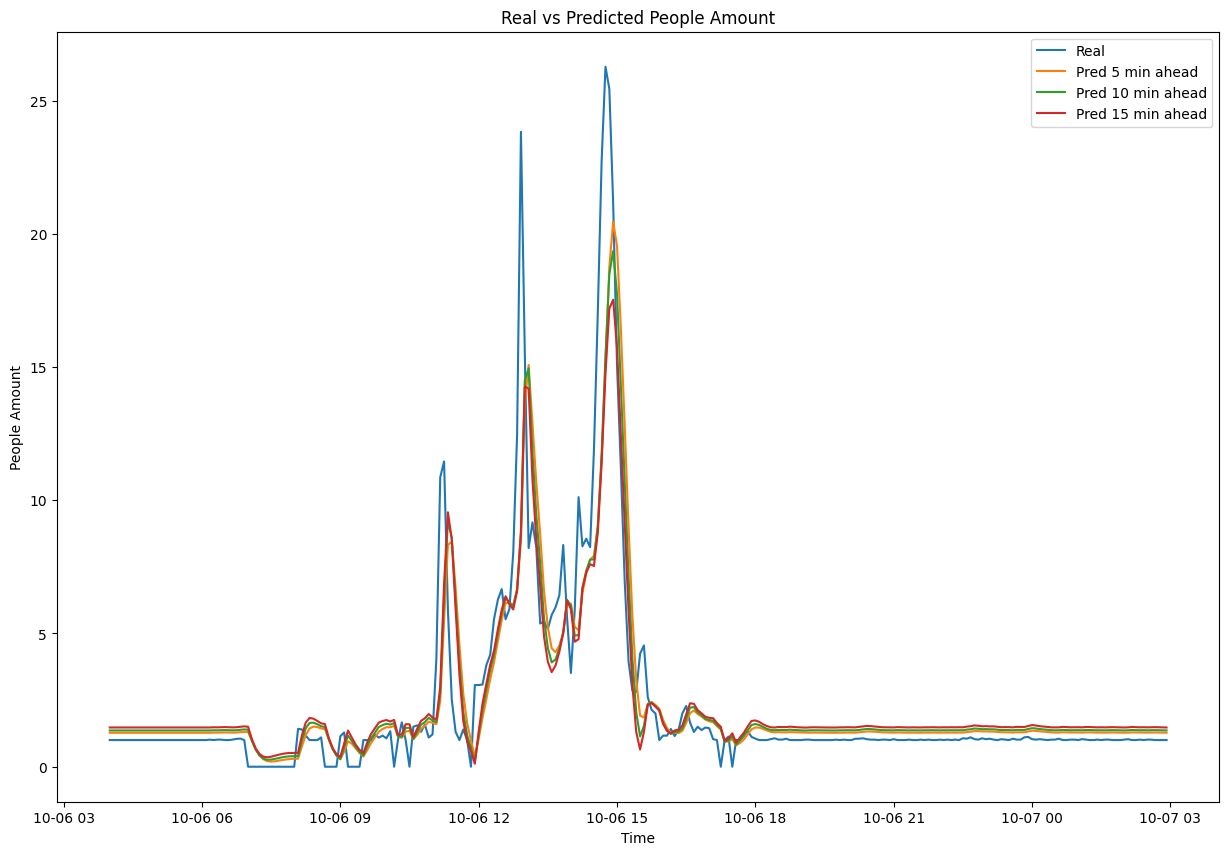

In [34]:
# Визуализация предсказаний vs реальных
plt.figure(figsize=(15, 10))
real_values = scaler.inverse_transform(y_test.reshape(-1, 1))
time_index = resampled_out.index[seq_length:]

plt.plot(time_index, real_values, label='Real')
for h in horizons:
    plt.plot(time_index, all_preds[h], label=f'Pred {h*5} min ahead')

plt.legend()
plt.xlabel('Time')
plt.ylabel('People Amount')
plt.title('Real vs Predicted People Amount')
plt.show()